## Kaggle - Time Series Analysis
Data Obtained from Wal-Mart w/ 5 years of store-item sales data

**Goal**: Predict 3 months of sales for 50 different items at 10 different stores

In [57]:
# Dependencies
import pandas as pd
import os
import matplotlib.pyplot as plt

In [3]:
os.listdir()

['.ipynb_checkpoints',
 'sample_submission.csv',
 'test.csv',
 'train.csv',
 'Untitled.ipynb']

In [32]:
df=pd.read_csv('train.csv')
print(f'{len(df)}')
df.head(100)

913000


,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10
...,...,...,...,...
95,2013-04-06,1,1,23
96,2013-04-07,1,1,17
97,2013-04-08,1,1,19
98,2013-04-09,1,1,13


In [42]:
df['date']=pd.to_datetime(df['date'], format='%m%d%y')

In [53]:
df['month']=df['date'].map(lambda x: f'{x.year}-{("0"+str(x.month))[-2:]}')
df.head(100)

,date,store,item,sales,month
0,2013-01-01,1,1,13,2013-01
1,2013-01-02,1,1,11,2013-01
2,2013-01-03,1,1,14,2013-01
3,2013-01-04,1,1,13,2013-01
4,2013-01-05,1,1,10,2013-01
...,...,...,...,...,...
95,2013-04-06,1,1,23,2013-04
96,2013-04-07,1,1,17,2013-04
97,2013-04-08,1,1,19,2013-04
98,2013-04-09,1,1,13,2013-04


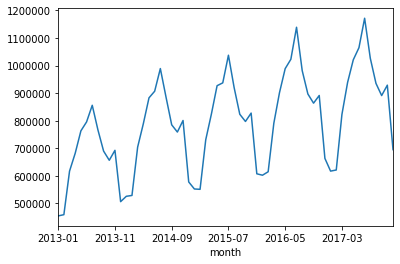

In [59]:
monthly_sales=df.sort_values('date').groupby('month')['sales'].sum()
monthly_sales.plot()
plt.show()

### This series is not stationary, which violates the regression assumption. A stationary series is one which: 
* mean, variance, and covariance do not vary with time
![stationary](https://github.com/kevinclee26/time_series_analysis/blob/main/assets/images/image_1.PNG?raw=true)

### Covariance and Correlation
* Std is a measure of dispersion of a distribution - low Std indicates that values tend to be close to the mean
* Covariance can be negative infinity to positive infinity - it measure how two variables change together, not the dependency
    * Since magnitude can vary with the scaling of the variables - it is only useful to find the direction of the relationship between two variables
    